In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

n=100000

def frozenlake(slippery, n):
    rewards_all = []
    total_reward = 0
    for i in range(n):
        #print(f"Iteracion {i}")
        env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=slippery)
        obs, info = env.reset()
        done = False
        
        while not done:
            action = env.action_space.sample()
            obs, reward, done, truncated, info = env.step(action)
            total_reward += reward
    
        env.close()
        rewards_all.append(total_reward)
    return rewards_all

In [7]:
r_slippery = frozenlake(True, n)
r_notslippery = frozenlake(False, n)
print("Recompensas totales en Slippery")
print(max(r_slippery))
print("Recompensas totales en Not Slippery")
print(max(r_notslippery))

Recompensas totales en Slippery
1399.0
Recompensas totales en Not Slippery
1362.0


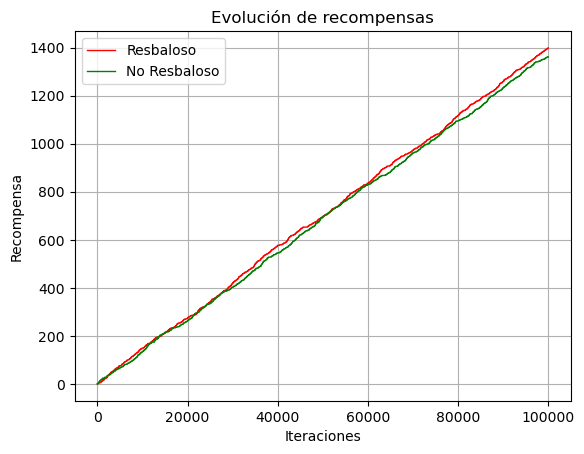

In [8]:
iteraciones = np.arange(n)
plt.figure()
plt.plot(iteraciones, r_slippery, linewidth=1.0, color='r', label='Resbaloso')
plt.plot(iteraciones, r_notslippery, linewidth=1.0, color='g', label='No Resbaloso')
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa')
plt.title('Evolución de recompensas')
plt.legend(loc='best')
plt.grid(True)
plt.show()